In [100]:
import pandas as pd
import numpy as np
import datetime as dt
import wrds
#import psycopg2 
import matplotlib.pyplot as plt
from dateutil.relativedelta import *
from pandas.tseries.offsets import *
from scipy import stats

In [101]:
conn = wrds.Connection()

Enter your WRDS username [sitisaifulbahri]:ssaifulb
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...


Exception during reset or similar
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/anaconda3/lib/python3.7/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/anaconda3/lib/python3.7/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.



Done


In [102]:
# Didnt end up using this in a code
COMPUSTAT_BEG_DATE = '01/01/2008'
CRSP_BEG_DATE = '01/01/2008'
CRSP_END_DATE = '12/31/2018'

In [103]:
#didnt end up using this in a code
companies = ('10107', '11308', '11850', '12490', '13407', '14008', '14541', '14542', '14593', '17778', '17830', 
            '18163', '19561', '20482', '21936', '22111', '22592', '22752', '26201', '26403', '43449', '47896', 
            '48725', '50876', '55976', '57665', '59328', '59555', '65875', '76076', '76127', '80341', '80539', 
            '82287', '83950', '84788', '86580', '86889', '88545', '89036', '89110', '89393', '90215', '90783',
            '91086', '91233', '91571', '92602', '92611', '92655')
len(companies)

50

In [104]:
libraries = conn.list_libraries()
library = "crsp"

tables = conn.list_tables(library = library)

In [107]:
stmt = """
SELECT date, permno, ret, prc
FROM crsp.msf 
WHERE permno IN {}
and date >= '01/01/2008'
and date < '12/31/2018'
""".format(companies)

data=conn.raw_sql(stmt)
data.head()

,date,permno,ret,prc
0,2008-01-31,10107.0,-0.084270,32.599998
1,2008-02-29,10107.0,-0.162273,27.199900
2,2008-03-31,10107.0,0.043386,28.379999
3,2008-04-30,10107.0,0.004933,28.520000
4,2008-05-30,10107.0,-0.003156,28.320000


In [108]:
#rotate the table
df=data
table=df.pivot(index='date', columns='permno', values='ret')

In [110]:
table.head()

permno,10107.0,11308.0,11850.0,12490.0,13407.0,14008.0,14541.0,14542.0,14593.0,17778.0,...,89110.0,89393.0,90215.0,90783.0,91086.0,91233.0,91571.0,92602.0,92611.0,92655.0
date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,-0.084270,-0.038618,-0.077810,-0.009158,NaN,0.003230,-0.108004,NaN,-0.316640,-0.039548,...,-0.068697,-0.055222,-0.171957,-0.434795,0.154827,-0.037407,0.474308,NaN,NaN,-0.126460
2008-02-29,-0.162273,-0.009153,0.011111,0.066754,NaN,-0.022966,0.047928,NaN,-0.076389,0.029412,...,-0.242424,0.255666,0.150453,0.115857,-0.194006,-0.082126,0.001340,NaN,NaN,-0.085759
2008-03-31,0.043386,0.047725,-0.027928,0.011242,NaN,-0.082162,-0.015001,NaN,0.147816,-0.047143,...,0.057895,0.097213,-0.030978,-0.358117,-0.121820,0.173632,0.194110,NaN,NaN,-0.260112
2008-04-30,0.004933,-0.032857,0.100378,0.048289,NaN,0.002154,0.126406,NaN,0.212195,0.003373,...,-0.401990,-0.077056,0.153102,0.283071,0.172702,0.248083,0.054933,0.008897,0.338197,-0.050349
2008-05-30,-0.003156,-0.027348,-0.042011,0.076471,NaN,0.051588,0.037962,NaN,0.085082,0.005977,...,0.104825,-0.050657,0.083620,-0.084936,0.024228,0.109613,0.142402,0.031942,0.034871,0.048422


In [61]:
mrets=table

In [62]:
mrets.mean() * 12

permno
10107.0    0.220215
11308.0    0.117965
11850.0    0.041765
12490.0    0.085643
13407.0    0.304699
14008.0    0.171767
14541.0    0.096917
14542.0    0.179502
14593.0    0.308556
17778.0    0.126704
17830.0    0.134892
18163.0    0.081335
19561.0    0.268807
20482.0    0.152229
21936.0    0.158852
22111.0    0.132368
22592.0    0.158690
22752.0    0.165140
26201.0    0.057946
26403.0    0.201532
43449.0    0.157802
47896.0    0.183341
48725.0    0.225656
50876.0    0.179977
55976.0    0.095918
57665.0    0.212711
59328.0    0.184129
59555.0    0.070447
65875.0    0.132357
76076.0    0.159316
76127.0    0.109595
80341.0    0.260138
80539.0    0.418066
82287.0    0.397372
83950.0    0.440270
84788.0    0.416010
86580.0    0.410283
86889.0    0.374106
88545.0    0.147213
89036.0    0.173963
89110.0    0.237208
89393.0    0.621494
90215.0    0.349132
90783.0    0.168385
91086.0    0.112915
91233.0    0.291989
91571.0    0.197539
92602.0    0.138171
92611.0    0.264973
92655.0    0.

In [65]:
mrets.fillna(value=0, inplace=True)
Mcov=mrets.cov()*12
Mcov.head()

permno,10107.0,11308.0,11850.0,12490.0,13407.0,14008.0,14541.0,14542.0,14593.0,17778.0,...,89110.0,89393.0,90215.0,90783.0,91086.0,91233.0,91571.0,92602.0,92611.0,92655.0
permno,,,,,,,,,,,,,,,,,,,,,
10107.0,0.048472,0.010357,0.010711,0.012258,-0.001143,0.011809,0.018684,0.012025,0.022912,0.007254,...,0.015673,0.024041,0.026994,0.012109,0.012090,0.016466,0.014330,0.013457,0.016572,0.005162
11308.0,0.010357,0.020806,0.008395,0.004854,0.000389,0.006540,0.010974,0.004017,0.007831,0.005289,...,0.006752,-0.006719,0.002924,0.001816,0.005390,0.007671,0.002521,0.018756,0.005909,0.003553
11850.0,0.010711,0.008395,0.024610,0.009900,0.000268,0.006490,0.022947,0.001190,0.005612,0.007720,...,0.009203,0.002248,0.004972,0.025868,0.009490,0.009492,0.008789,0.011711,0.006739,0.011498
12490.0,0.012258,0.004854,0.009900,0.033001,0.000082,0.008719,0.014175,0.004485,0.015522,0.008414,...,0.007436,0.015839,0.016787,0.032263,0.007267,0.012511,0.003401,0.007289,0.008594,0.010532
13407.0,-0.001143,0.000389,0.000268,0.000082,0.088452,0.007216,-0.000292,0.009407,0.004348,0.000076,...,0.004361,0.035900,0.019611,0.004479,0.023952,0.012795,0.017625,0.000296,0.008503,0.005400


In [66]:
noa = 50
weights = np.random.random(noa)
# random weight
weights /= np.sum(weights)

In [67]:
np.sum(mrets.mean() * weights) * 12
## expected portfolio return

0.21987246851149186

In [68]:
np.dot(weights.T, np.dot(mrets.cov() * 12, weights))
## expected portfolio variance

0.020687430124711914

In [69]:
np.sqrt(np.dot(weights.T, np.dot(mrets.cov() * 12, weights)))
#portfolio standard dev.

0.1438312557294551

In [70]:
prets = []
pvols = []
for p in range (5000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(mrets.mean() * weights) * 12)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(mrets.cov() * 12, weights))))

In [71]:
prets = np.array(prets)
pvols = np.array(pvols)

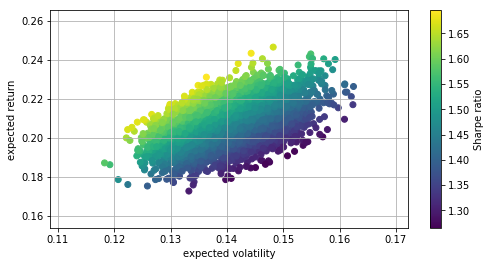

In [72]:
plt.figure(figsize=(8, 4)) #figure size
plt.scatter(pvols, prets, c=prets / pvols, marker='o') 
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [73]:
def statistics(weights):        
    #==========
    #weights : array-like 
    #weight for different securities  
    # returns
    #=======
    #pret : float
    #      exp portfolio return
    #pvol : float
    #      exp protfolio volatility
    #pret / pvol : float
    #    sharp ratio for rf = 0
    weights = np.array(weights)
    pret = np.sum(mrets.mean() * weights) * 12
    pvol = np.sqrt(np.dot(weights.T, np.dot(mrets.cov() * 12, weights)))
    return np.array([pret, pvol, pret / pvol])

In [74]:
import scipy.optimize as sco

In [75]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [76]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [77]:
bnds = tuple((0, 1) for x in range(noa))

In [78]:
noa*[1. / noa,]

[0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

In [79]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

In [80]:
opts['x'].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.028, 0.   , 0.   , 0.   , 0.106,
       0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.178, 0.   , 0.035, 0.07 , 0.   , 0.006, 0.   ,
       0.   , 0.065, 0.   , 0.   , 0.   , 0.   , 0.019, 0.   , 0.053,
       0.012, 0.   , 0.   , 0.   , 0.   , 0.06 , 0.   , 0.   , 0.   ,
       0.042, 0.02 , 0.   , 0.145, 0.153])

In [81]:
statistics(opts['x']).round(3)
# expected return, std, max sharp ratio

array([0.27 , 0.115, 2.349])

In [82]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [83]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

In [84]:
optv['x'].round(3)

array([0.   , 0.   , 0.064, 0.079, 0.04 , 0.   , 0.   , 0.243, 0.008,
       0.074, 0.   , 0.112, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.011, 0.   , 0.125, 0.   , 0.   , 0.081, 0.087, 0.   , 0.   ,
       0.026, 0.042, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.004, 0.002, 0.   , 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [85]:
statistics(optv['x']).round(3)
# for min-variance expected return, std, sharp ratio

array([0.111, 0.082, 1.365])

In [86]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [87]:
def min_func_port(weights):
    return statistics(weights)[1]

In [88]:
trets = np.linspace(0.05, 0.23, 30)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

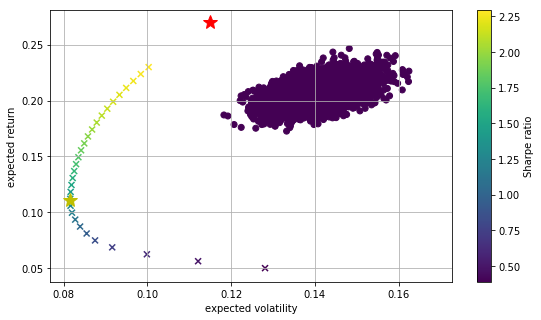

In [89]:
plt.figure(figsize=(9, 5))
#Scatter as random portfolio
plt.scatter(pvols, prets,
            c=prets / prets, marker='o')
#x as efficient frontier           
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
#red star as max Sharp ratio           
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
#yellow star as min Variance Portfolio        
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)          
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [91]:
import scipy.interpolate as sci

In [92]:
# to get the point of upper half
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [93]:
# add functions
tck = sci.splrep(evols, erets)

In [94]:
# Efficient frontier function
def f(x):
    return sci.splev(x, tck, der=0)
# first derivative for EF
def df(x):
    return sci.splev(x, tck, der=1)

In [95]:
#ASSUME rf = 0.02 ###need get it right####
def equations(p, rf=0.02):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [96]:
# solve the function
opt = sco.fsolve(equations, [0.02, 0.004, 0.5])

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [97]:
# get a,b,x close to the red star
opt

array([0.02      , 3.03177774, 0.10671219])

In [98]:
#check if close to 0
np.round(equations(opt),6)

array([ 0.      ,  0.093595, -0.009988])

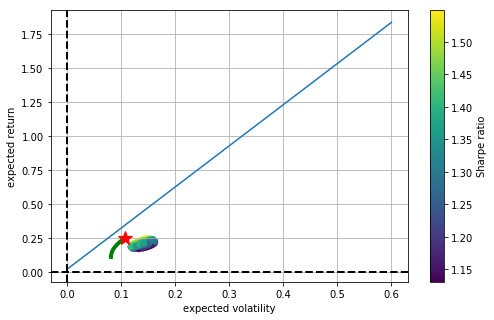

In [99]:
plt.figure(figsize=(8, 5))

plt.scatter(pvols, prets,
            c=(prets - 0.02) / pvols, marker='o')
#green line is efficient frontier
plt.plot(evols, erets, 'g', lw=4.0)

#assume CML from 0 to 0.6           
cml_x = np.linspace(0.0, 0.6)
#plot
plt.plot(cml_x, opt[0] + opt[1] * cml_x, lw=1.5)
# red star is tangent point           
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')